In [1]:
import random
import sys
import json
import os

sys.path.append("..")
import calc_metrics

C:\Users\fschr\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Load predictions and gold

In [2]:
fn_pred = "C:/Users/fschr/Desktop/Masterarbeit/master-thesis-software-ie/experiments/subtask1/model_comparison/hyper_base_bert-base-uncased/prediction.txt" #../data/subtask1/prediction/
fn_gold = "C:/Users/fschr/Desktop/Masterarbeit/master-thesis-software-ie/data/subtask1/subtask1_test.labels.txt"

preds = calc_metrics.load_bio(fn_pred)
gold = calc_metrics.load_bio(fn_gold)

print(len(preds), len(gold))

8181 8181


## show example:

In [3]:
idx = random.choice(list(range(len(gold))))
print(f"test sentence: {idx}")
print(list(zip(gold[idx], preds[idx])))

test sentence: 4353
[('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('B-Application_Usage', 'B-Application_Usage'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O'), ('O', 'O')]


## every sentence need to have the same length!

In [4]:
for idx, (g, pred) in enumerate(zip(gold, preds)):
    if len(g) != len(pred):
        print(idx, len(g), len(pred))

## Are there different labels in gold and prediction?

In [5]:
label_test = {anno for sentence in gold for anno in sentence}    
label_pred = {anno for sentence in preds for anno in sentence}
print(len(label_test), len(label_pred))
label_test - label_pred

26 23


{'I-OperatingSystem_Mention', 'I-PlugIn_Creation', 'I-PlugIn_Mention'}

## Calculate Metrics

In [6]:
metrics_df = calc_metrics.compute(preds, gold)

In [7]:
metrics_df

,precision,recall,f1,number
Application_Creation,0.686275,0.744681,0.714286,47.0
Application_Deposition,0.612903,0.863636,0.716981,22.0
Application_Mention,0.259259,0.225806,0.241379,31.0
Application_Usage,0.752066,0.733871,0.742857,248.0
OperatingSystem_Mention,1.000000,0.058824,0.111111,17.0
OperatingSystem_Usage,0.357143,0.625000,0.454545,16.0
PlugIn_Creation,0.400000,0.117647,0.181818,17.0
PlugIn_Deposition,0.333333,0.125000,0.181818,8.0
PlugIn_Mention,0.300000,0.272727,0.285714,11.0
PlugIn_Usage,0.555556,0.333333,0.416667,45.0


In [8]:
class_names = metrics_df.index.tolist()

In [9]:
metrics_df = metrics_df.iloc[:-3]
metrics_df.shape

(13, 4)

In [10]:
metrics_df

,precision,recall,f1,number
Application_Creation,0.686275,0.744681,0.714286,47.0
Application_Deposition,0.612903,0.863636,0.716981,22.0
Application_Mention,0.259259,0.225806,0.241379,31.0
Application_Usage,0.752066,0.733871,0.742857,248.0
OperatingSystem_Mention,1.000000,0.058824,0.111111,17.0
OperatingSystem_Usage,0.357143,0.625000,0.454545,16.0
PlugIn_Creation,0.400000,0.117647,0.181818,17.0
PlugIn_Deposition,0.333333,0.125000,0.181818,8.0
PlugIn_Mention,0.300000,0.272727,0.285714,11.0
PlugIn_Usage,0.555556,0.333333,0.416667,45.0


<Figure size 1400x800 with 0 Axes>

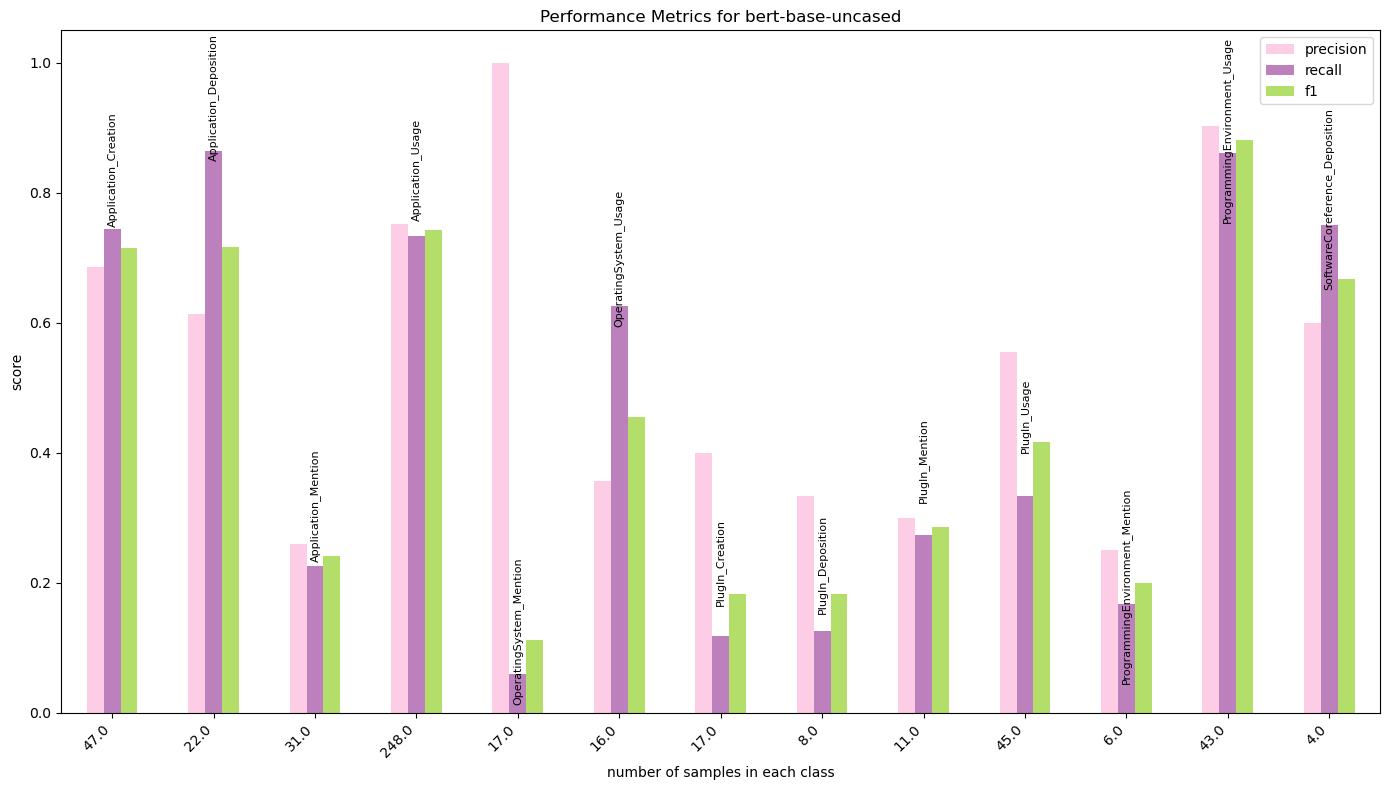

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = sns.color_palette('Set3')
colors_list = [colors[7], colors[9], colors[6]]
# Set the size of the plot
plt.figure(figsize=(14, 8))

# Plotting the precision, recall, and f1-score
ax = metrics_df.plot(kind='bar', x='number', y=['precision', 'recall', 'f1'], color=colors_list, figsize=(14, 8))

# Adding title and labels
plt.title('Performance Metrics for bert-base-uncased')
plt.xlabel('number of samples in each class')
plt.ylabel('score')

for i in range(len(metrics_df)):
    p = ax.containers[1][i]  # Select the middle bar in each group
    class_name = metrics_df.index[i]  # Get the class name for the current group
    ax.text(x=p.get_x() + p.get_width() / 2, 
            y=p.get_height() + 0.18,  # Position slightly above the bar#+ 0.02
            s=class_name, 
            ha='center', va='top', rotation=90, fontsize=8, color='black')
        
        
# Rotating the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
sns.color_palette('Set3')

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [8]:
result = metrics_df.loc["macro_weighted"].drop("number").to_dict()

In [9]:
result

{'precision': 0.6988917160310092,
 'recall': 0.625242718446602,
 'f1': 0.6515889050289028}

In [10]:
path = "C:/Users/fschr/Desktop/Masterarbeit/master-thesis-software-ie/experiments/subtask1/model_comparison/scibert_uncased_hyperparams/training_args.json"
with open(path) as file:
    hyperparameter = json.load(file)

In [11]:
hyperparameter

{'save_total_limit': 2,
 'metric_for_best_model': 'f1_macro_weighted',
 'output_dir': '/data_ssds/disk01/ottowg/somd/2024-07-24_16-31-41',
 'learning_rate': 1.2713362421362374e-05,
 'num_train_epochs': 7,
 'weight_decay': 0.0001,
 'max_grad_norm': 1.0,
 'warmup_ratio': 0.1,
 'per_device_eval_batch_size': 16,
 'evaluation_strategy': 'epoch',
 'logging_steps': 100,
 'seed': 42,
 'per_device_train_batch_size': 8,
 'gradient_accumulation_steps': 1}

In [12]:
result['name'] = 'scibert_uncased_hyperparams'
# result['negative_sampling_ratio'] = '16_1'
result['epochs'] = hyperparameter['num_train_epochs']
result['train_batch_size'] = hyperparameter['per_device_train_batch_size'] * hyperparameter['gradient_accumulation_steps']
result['val_batch_size'] = hyperparameter['per_device_eval_batch_size']
result['lr'] = hyperparameter['learning_rate']
result['weight_decay'] = hyperparameter['weight_decay']
result['warmup_ratio'] = hyperparameter['warmup_ratio']
result

{'precision': 0.6988917160310092,
 'recall': 0.625242718446602,
 'f1': 0.6515889050289028,
 'name': 'scibert_uncased_hyperparams',
 'epochs': 7,
 'train_batch_size': 8,
 'val_batch_size': 16,
 'lr': 1.2713362421362374e-05,
 'weight_decay': 0.0001,
 'warmup_ratio': 0.1}

### Write the result in a text file

In [13]:
with open("subtask1_model_comparison_results.txt", "a") as myfile:
    myfile.write(json.dumps(result) + '\n')